In [1]:
import os
import pandas as pd
import numpy as np
import cv2

In [2]:
def read_FER13_and_create_images(dataset_dir='Dataset\input\FER13'):
    dir_path = os.getcwd()
    path_dataset_dir = os.path.join(dir_path, dataset_dir)
    csv_dir =  os.path.join(path_dataset_dir, 'fer2013.csv')
    
    csv_fer = pd.read_csv(csv_dir)
    pixels_lst = csv_fer['pixels'].values.tolist()
    emotions_lst = csv_fer['emotion'].values.tolist()
    
    from_id_to_emotion = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
    filename_lst = []
    for i, pixels in enumerate(pixels_lst):
        pixels = list(pixels.split(" "))
        pixels_np = np.array(pixels, dtype=np.float64).reshape((48, 48))
        filename = f'emotion_fer13_{i}.jpg'
        filename_dir = os.path.join(path_dataset_dir, filename)
        cv2.imwrite(filename_dir, pixels_np)
         
        filename_lst.append(filename)
    
    emotions = []
    for emotion in emotions_lst:
        emotions.append(from_id_to_emotion[emotion])
    csv_fer['pth'] = filename_lst
    csv_fer['label'] = emotions
    csv_dir =  os.path.join(path_dataset_dir, 'fer_13.csv')
    csv_fer.to_csv(csv_dir)

In [3]:
read_FER13_and_create_images()

In [4]:
def create_CK_csv(dataset_dir='Dataset\input\KC_extend', folders=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']):
    lst_img_pth = []
    lst_label = []
    dir_path = os.getcwd()
    path_dataset_dir = os.path.join(dir_path, dataset_dir)
    
    for folder in folders:
        images_folder_dir = os.path.join(path_dataset_dir, folder)
        arr = os.listdir(images_folder_dir)
        imgs_path = [os.path.join(folder, pth) for pth in arr]
        lst_img_pth.extend(imgs_path)
        labels = [folder for i in range(len(arr))]
        lst_label.extend(labels)
        
    data = {'pth': lst_img_pth,
            'label': lst_label}
    
    df = pd.DataFrame(data)
    csv_dir = os.path.join(path_dataset_dir, 'KC_extend.csv')
    df.to_csv(csv_dir)

In [5]:
def concat_all_emotic_files(dataset_dir='Dataset\input\emotic', files=['annot_arrs_extra_train.csv', 'annot_arrs_test.csv', 'annot_arrs_train.csv', 'annot_arrs_val.csv']):
    dir_path = os.getcwd()
    path_dataset_dir = os.path.join(dir_path, dataset_dir)
    df = pd.DataFrame()
    for file in files:
        csv_path = os.path.join(path_dataset_dir, file)
        csv_fer = pd.read_csv(csv_path)
        df = pd.concat([df, csv_fer])
    df.columns = df.columns.str.replace('Crop_name', 'pth')
    csv_dir = os.path.join(path_dataset_dir, 'emotic.csv')
    df.to_csv(csv_dir, index=False)

In [6]:
concat_all_emotic_files()

In [7]:
# create_CK_csv()

In [2]:
def read_dataset_and_create_df(dataset_dir='Dataset/input/affectnet', labels_csv='labels.csv', annotations_csv='test_outputs.csv'):
    dir_path = os.getcwd()
    path_dataset_dir = os.path.join(dir_path, dataset_dir)
    path_sens_features = os.path.join(path_dataset_dir, annotations_csv)
    path_csv_labels = os.path.join(path_dataset_dir, labels_csv)

    csv_sf = pd.read_csv(path_sens_features)
    csv_labels = pd.read_csv(path_csv_labels)
    df = pd.merge(csv_sf, csv_labels, on="pth")
    return df

In [3]:
affect_net_df = read_dataset_and_create_df()

In [4]:
FER_2013_df = read_dataset_and_create_df(dataset_dir='Dataset\input\FER13', labels_csv='fer_13.csv')

In [5]:
ck_df = read_dataset_and_create_df(dataset_dir='Dataset\input\KC_extend', labels_csv='KC_extend.csv')

In [6]:
emotic_df = read_dataset_and_create_df(dataset_dir='Dataset\input\emotic', labels_csv='emotic.csv')

In [7]:
from matplotlib import pyplot as plt

def create_race4_annotation_plot(datasets_dict):
    races4 = ['Asian', 'Black', 'Indian', 'White']
    plot_dict = {}
    datasets = datasets_dict.keys()
#     for key, value in datasets_dict.items():
#         percentage = []
#         race4_lst = value['race4'].values.tolist()
#         for race in races4:
#             count = race4_lst.count(race)
#             percentage.append(count/len(race4_lst))
#         plot_dict[key] = percentage
#         datasets.append(key)
    for race in races4:
        percentage = []
        for key, value in datasets_dict.items():
            race4_lst = value['race4'].values.tolist()   
            count = race4_lst.count(race)
            percentage.append(count/len(race4_lst))
        plot_dict[race] = percentage
    
    plotdata = pd.DataFrame(plot_dict, index=datasets)
    display(plotdata)
    plotdata.plot(kind="bar", stacked=True).legend(loc='upper center', ncol=4, title="RACES")
    plt.title("Dataset race annotation percentage")
    plt.xlabel("Dataset")
    plt.ylabel("Percentage")
    plt.ylim([0, 1.5])

In [8]:
from matplotlib import pyplot as plt

def create_race_annotation_plot(datasets_dict):
    races = ['East Asian', 'Latino_Hispanic', 'Indian', 'Southeast Asian', 'Middle Eastern', 'Black', 'White']
    plot_dict = {}
    datasets = datasets_dict.keys()
    for race in races:
        percentage = []
        for key, value in datasets_dict.items():
            race4_lst = value['race'].values.tolist()   
            count = race4_lst.count(race)
            percentage.append(count/len(race4_lst))
        plot_dict[race] = percentage
    
    plotdata = pd.DataFrame(plot_dict, index=datasets)
    display(plotdata)
    plotdata.plot(kind="bar", stacked=True).legend(loc='upper center', ncol=3, title="RACES")
    plt.title("Dataset race annotation percentage")
    plt.xlabel("Dataset")
    plt.ylabel("Percentage")
    plt.ylim([0, 1.5])

In [9]:
datasets_dict = {'AffectNet': affect_net_df, 'FER13': FER_2013_df, 'CK+':ck_df, 'EMOTIC':emotic_df}

,Asian,Black,Indian,White
AffectNet,0.090683,0.084088,0.063431,0.761798
FER13,0.137682,0.105999,0.043247,0.713072
CK+,0.620652,0.218478,0.094565,0.066304
EMOTIC,0.137303,0.188982,0.066660,0.607056


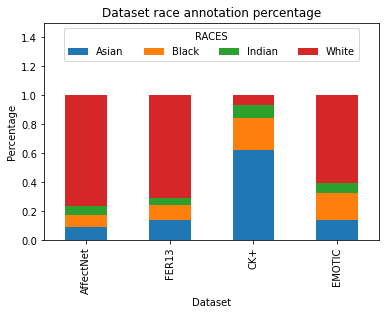

In [10]:
create_race4_annotation_plot(datasets_dict)

,East Asian,Latino_Hispanic,Indian,Southeast Asian,Middle Eastern,Black,White
AffectNet,0.059937,0.101915,0.025041,0.016238,0.077521,0.075247,0.644100
FER13,0.083261,0.043163,0.018642,0.024577,0.052888,0.099395,0.678073
CK+,0.359783,0.033696,0.056522,0.058696,0.088043,0.277174,0.126087
EMOTIC,0.243006,0.047297,0.019348,0.018834,0.067751,0.060185,0.543578


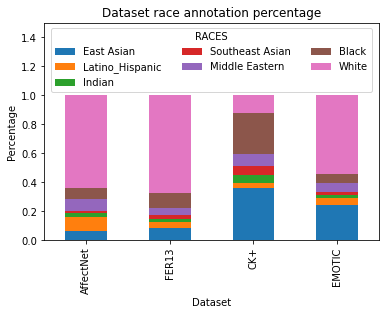

In [11]:
create_race_annotation_plot(datasets_dict)

In [12]:
def create_datasets_df_per_emotion_class(datasets_dict):
    datasets = datasets_dict.keys()
    emotions_classes = ['anger', 'contempt', 'disgust', 'fear', 'sad', 'surprise', 'happy', 'neutral']
    emotion_dict = {}
    emotion_dict_2 = {}
    for emotion in emotions_classes:
        emotion_lst = []
        emotion_percentage_list = []
        for key, value in datasets_dict.items():
            emotions = value['label'].values.tolist()
            count = emotions.count(emotion)
            emotion_lst.append(count)
            emotion_percentage_list.append(count/len(emotions))
        emotion_dict[emotion] = emotion_percentage_list
        emotion_dict_2[emotion] = emotion_lst
    
    df = pd.DataFrame(emotion_dict, index=datasets)
    df2 = pd.DataFrame(emotion_dict_2, index=datasets)
    display(df)
    display(df2)
    return df, df2

In [13]:
datasets_dict = {'affectNet': affect_net_df, 'FER13': FER_2013_df, 'CK+':ck_df}

In [14]:
create_datasets_df_per_emotion_class(datasets_dict)

,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,0.086501,0.013037,0.013221,0.022173,0.088507,0.048983,0.467285,0.260295
FER13,0.000000,0.000000,0.015242,0.142698,0.169337,0.111517,0.250481,0.172709
CK+,0.048913,0.019565,0.064130,0.027174,0.000000,0.090217,0.000000,0.644565


,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,24882,3750,3803,6378,25459,14090,134415,74874
FER13,0,0,547,5121,6077,4002,8989,6198
CK+,45,18,59,25,0,83,0,593


(              anger  contempt   disgust      fear       sad  surprise  \
 affectNet  0.086501  0.013037  0.013221  0.022173  0.088507  0.048983   
 FER13      0.000000  0.000000  0.015242  0.142698  0.169337  0.111517   
 CK+        0.048913  0.019565  0.064130  0.027174  0.000000  0.090217   
 
               happy   neutral  
 affectNet  0.467285  0.260295  
 FER13      0.250481  0.172709  
 CK+        0.000000  0.644565  ,
            anger  contempt  disgust  fear    sad  surprise   happy  neutral
 affectNet  24882      3750     3803  6378  25459     14090  134415    74874
 FER13          0         0      547  5121   6077      4002    8989     6198
 CK+           45        18       59    25      0        83       0      593)

In [15]:
affectNet_dict = {'affectNet': affect_net_df}

In [16]:
df_percentage, df_total_classes = create_datasets_df_per_emotion_class(affectNet_dict)

,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,0.086501,0.013037,0.013221,0.022173,0.088507,0.048983,0.467285,0.260295


,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,24882,3750,3803,6378,25459,14090,134415,74874


<AxesSubplot:>

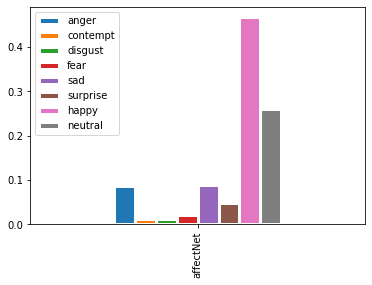

In [17]:
df_percentage.plot(kind='bar', edgecolor='white', linewidth=3)

In [18]:
affect_net_balance = read_dataset_and_create_df(labels_csv='balance_dataset_labels.csv', annotations_csv='balance_dataset_annotations.csv')

In [20]:
affectNet_dict = {'affectNet': affect_net_df, 'affectNet Balance': affect_net_balance} 

In [21]:
df_percentage, df_total_classes = create_datasets_df_per_emotion_class(affectNet_dict)

,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,0.086501,0.013037,0.013221,0.022173,0.088507,0.048983,0.467285,0.260295
affectNet Balance,0.143146,0.143223,0.068136,0.084139,0.143146,0.131918,0.143146,0.143146


,anger,contempt,disgust,fear,sad,surprise,happy,neutral
affectNet,24882,3750,3803,6378,25459,14090,134415,74874
affectNet Balance,3748,3750,1784,2203,3748,3454,3748,3748


<AxesSubplot:>

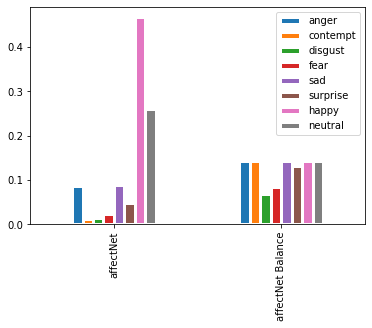

In [22]:
df_percentage.plot(kind='bar', edgecolor='white', linewidth=3)